# Szinguláris érték felbontás

## (SVD, Singular Value Decomposition)

Az [SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) a sajátérték-sajátvektor felbontás általánosítása téglalap alakú mátrixokra. Az SVD az $\mathbf{X}$ (*n*⁢ x *m*)-es transzformáló mátrix hatását három jól érthető részre bontja:

* forgatás ($\mathbf{V}^T$)

* skálázás ($\mathbf{\Lambda}^{1/2}$)

* forgatás  ($\mathbf{U}^T$)

A mátrix SVD felbontása:

  $$\mathbf{X}= \mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T$$

ábrán személtetve:

<img src="svd1.png" width="480">

## Az SVD felbontás kapcsolata a sajátérték felbontással

Egy szimmetrikus $\mathbf{A}$ mátrix felbontható ortogonális $\mathbf{U}$ mátrixszal ($\mathbf{U}^T\mathbf{U}=\mathbf{E}$, $\mathbf{E}$ egységmátrix) és a sajátértékekből álló átlós $\mathbf{\Lambda}$ mátrixszal az alábbi módon:

  $$\mathbf{A}= \mathbf{U}\mathbf{\Lambda}\mathbf{U}^T$$

Egy *tetszőleges* (*n*⁢ x *m*)-es $\mathbf{X}$ mátrixból kétféleképpen is szimmetrikus mátrixot készíthetünk (egyik (*m*⁢ x *m*)-es, a másik (*n*⁢ x *n*)-es lesz): $\mathbf{X}^T \mathbf{X}$ vagy $\mathbf{X} \mathbf{X}^T$. Ezek a *szimmetrikus* mátrixok felbonthatók *azonos* sajátértékek szerint:

 $$\mathbf{X}^T \mathbf{X}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^T=(\mathbf{V}\mathbf{\Lambda}^{1/2}\mathbf{U}^T)(\mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T)$$

és

 $$\mathbf{X} \mathbf{X}^T=\mathbf{U}\mathbf{\Lambda}\mathbf{U}^T=(\mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T)(\mathbf{V}\mathbf{\Lambda}^{1/2}\mathbf{U}^T)$$

tehát bármely *r* rangú $\mathbf{X}$ mátrix felbontható ortogonális  $\mathbf{U}$ és  $\mathbf{V}$ mátrixszokkal és a szinguláris értékekből álló átlós $\mathbf{\Lambda}^{1/2}$ mátrixszal:

 $$\mathbf{X}= \mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T$$ 

ahol

 $$\mathbf{\Lambda}^{1/2}=\begin{bmatrix}\sqrt{\lambda_1} & \cdots  & 0\\ \vdots  & \ddots & \vdots \\ 0 & \cdots  & \sqrt{\lambda_r}\end{bmatrix}$$

és *r* az $\mathbf{X}$ mátrix *rangja*.


### Példa

Legyen

$$\mathbf{X} = \begin{bmatrix} 1 & 2\\ 2 & 1\\ 1 & 3 \end{bmatrix}$$ 

Keressük meg az  $\mathbf{X} \mathbf{X}^T$ mátrix sajátértékeit, ezután számítsuk ki $\mathbf{\Lambda}^{1/2}$-t, az $\mathbf{X}$ mátrix SVD felbontását és a $\mathbf{V}_1$, $\mathbf{V}_2$ sajátvektorokat. Ezután számítsuk ki $\mathbf{U}$-t a megfelelő képletből és az $\mathbf{X}$ mátrix $\mathbf{X}_1$ legjobb 1-rangú közelítését.

<u>Megoldás</u> (Python)

In [1]:
import numpy as np
from numpy import linalg as LA
X = np.array([[1,2],[2,1],[1,3]])
# X'.X sajátérték felbontása
e,V = LA.eig(np.dot(X.T,X))
Lam = np.sqrt(np.diag(e))
# szinguláris értékek
np.diag(Lam)
U = np.dot(X,V)/np.sqrt(e)
# ez az eredeti X mátrix:
np.dot(U,np.dot(Lam,V.T))

array([[ 1.,  2.],
       [ 2.,  1.],
       [ 1.,  3.]])

In [2]:
# X legjobb 1-rangú közelítése
X1 = np.sqrt(e[1])*np.outer(U[:,1],V[:,1].T)
# eltérések:
X1 - X

array([[ 0.12017367, -0.06973949],
       [-1.06201737,  0.61631261],
       [ 0.55429524, -0.32167002]])

In [3]:
# X SVD felbontása beépített függvénnyel
U,S,V = LA.svd(X)
# szinguláris értékek nagyság szerint rendezve
S

array([ 4.2499715 ,  1.39202811])

## Az SVD felbontás két változata

<img src="svd2.png" width="400" >

## Az SVD tulajdonságai

A kétfajta sajátvektor rendszer egymásból számítható:

$$\mathbf{U}_m=\frac{1}{\sqrt{\lambda_m}}\mathbf{X}\mathbf{V}_m \;\;\;\;\;m=1,...,r.$$

Az SVD-vel felírható $\mathbf{X}$ legjobb *k*-ad rangú közelítése:

$$\mathbf{X}_k=\sum_{m=1}^{k}\sqrt{\lambda_m}\mathbf{U}_m\mathbf{V}_m^T \;\;\;\;\;k\le r,$$

a közelítés hibája:

$$\varepsilon_k^2=\sum_{m,n}\left | x(m,n)-x_k(m,n)\right |^2$$   a figyelembe nem vett sajátértékek összege: $$\varepsilon_k^2=\sum_{m=k+1}^r \lambda_m$$

## A mátrix sorfejtése, spektruma

Az $\mathbf{X}$ mátrix *k* tagból álló sorfejtése

$$\mathbf{X}_k=\sum_{m=1}^{k}\sqrt{\lambda_m}\mathbf{U}_m\mathbf{V}_m^T \;\;\;\;\;k\le r,$$

a mátrix *spektrum*át a $\sqrt{\lambda_m}$ szinguláris értékek adják (*m*=1, … , *r* ).

## Pszeudoinverz

Bármely téglalap alakú $\mathbf{X}$ mátrixra létezik az $\mathbf{X}^+$ pszeudoinverz:

 $$\mathbf{X}^+= \mathbf{V}\mathbf{\Lambda}^{1/2+}\mathbf{U}^T$$ 

ahol

 $${\mathbf{\Lambda}^{1/2+}\atop{(m,m)}} = \begin{bmatrix}\lambda_1^{-1/2} & \cdots  & 0 & \cdots  & 0\\ \vdots  & \ddots & \vdots & & \vdots\\ 0 & \cdots  & \lambda_r^{-1/2} & \cdots  & 0\\ \vdots &    & \vdots &   \ddots   & \vdots \\ 0 & \cdots  & 0 & \cdots  & 0\end{bmatrix}$$ .

A $\mathbf{\Lambda}^{1/2+}$ mátrix főátlójában az *r*-nél nagyobb indexű elemek zérusok.

## A legkisebb négyzetek problémájának megoldása SVD-vel

A feladat a következő hiba norma minimalizációja:

$$\left \| \mathbf{A}\mathbf{x}-\mathbf{y} \right \|$$ 

A legkisebb négyzetes (LKN) megoldás $\mathbf{x}$-re az $\mathbf{A}$ mátrix SVD felbontásával számított pszeudoinverzzel kapható meg:

$$\mathbf{x}= \mathbf{V}\mathbf{\Lambda}^{1/2+}\mathbf{U}^T \mathbf{y}$$ .

## A súlyozott legkisebb négyzetek problémájának megoldása SVD-vel

Most minimalizáljuk a következő hiba normát:

$$ (\mathbf{A}\mathbf{x}-\mathbf{y})^T \mathbf{P}  (\mathbf{A}\mathbf{x}-\mathbf{y})$$ 

A legkisebb négyzetes (LKN) megoldás $\mathbf{x}$-re a $\mathbf{P}_0\mathbf{A}$ mátrix SVD felbontásával ($\mathbf{P}_0\mathbf{A}= \mathbf{U}\mathbf{\Lambda}^{1/2}\mathbf{V}^T$) számított pszeudoinverzzel kapható meg, ahol $\mathbf{P}_0$ a $\mathbf{P}$ mátrix négyzetgyöke, $\mathbf{P}=\mathbf{P}_0^T\mathbf{P}_0$:

$$\mathbf{x}= \mathbf{V}\mathbf{\Lambda}^{1/2+}\mathbf{U}^T \mathbf{P}_0\mathbf{y}$$ .

## Mátrix approximáció SVD-vel

<u>Példa: magyarországi geoidfelület közelítése SVD-vel</u>

Beolvassuk a geoid adatokat:

In [4]:
geoid = np.loadtxt("geoid.txt")

geoidmagasságok rácsa 35 sor, 70 oszlop

/home/tg/.local/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


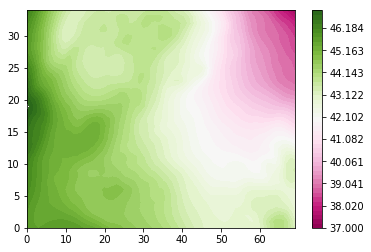

In [5]:
N = np.flipud(np.reshape(geoid[:,2],(35,70)))
import matplotlib.pyplot as plt
cmap = plt.get_cmap('PiYG')
levels=np.linspace(37,47)
plt.contourf(N,levels=levels,cmap=cmap)
plt.colorbar()
plt.show()

SVD felbontást számítunk

In [6]:
U,S,V = LA.svd(N)
# csökkenő sajátértékek szerint van rendezve
print S[0:10]
print U.shape, V.shape

[  2.13748970e+03   3.01654946e+01   1.27873105e+01   4.23156000e+00
   3.37888239e+00   2.95186350e+00   1.90147820e+00   1.25895030e+00
   9.66044712e-01   8.79068869e-01]
(35, 35) (70, 70)


A mátrix spektruma

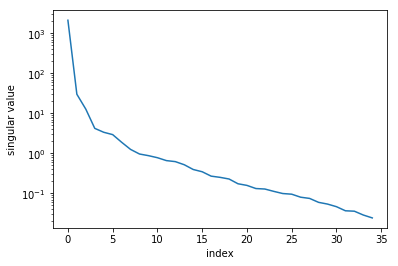

In [7]:
# a mátrix rangja
r = LA.matrix_rank(N)
plt.semilogy(range(r),S[:r])
plt.xlabel("index")
plt.ylabel("singular value")
plt.show()

Legjobb *n*-edfokú SVD közelítés, `step`-enként kirajzoltatva

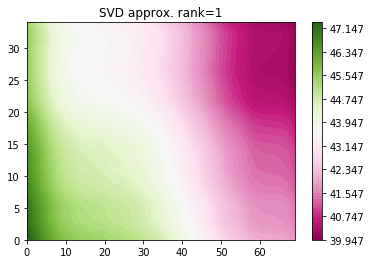

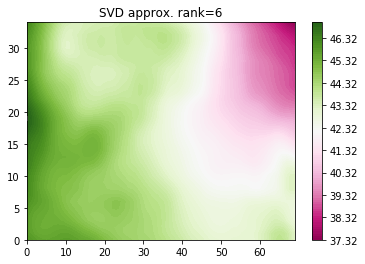

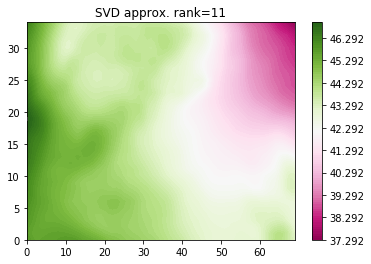

In [8]:
def svdapprox(U,S,V,k,n,step):
    dm = np.zeros((len(U),len(V)))
    for i in range(k,n):
        dm = dm + S[i]*np.outer(U.T[i],V[i])
        if np.mod(i,step) == 0:
            cmin = np.amin(dm)
            cmax = np.amax(dm)
            # print cmin, cmax
            levels=np.arange(cmin,cmax,step=0.1)
            plt.contourf(dm,levels=levels,cmap=cmap)
            plt.title("SVD approx. rank=%d" % (i+1))
            plt.colorbar()
            plt.show()
            # raw_input()
    return dm

Na = svdapprox(U,S,V,0,11,5)          

az utolsó közelítés hibája

min: -0.127  max: 0.123


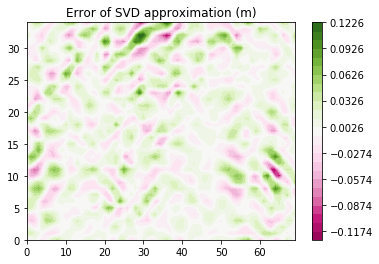

In [9]:
dN = N - Na
cmin = np.amin(dN)
cmax = np.amax(dN)
print "min: %.3f  max: %.3f" % (cmin, cmax)
levels=np.arange(cmin,cmax,step=0.01)
plt.contourf(dN,levels=levels,cmap=cmap)
plt.title("Error of SVD approximation (m)")
plt.colorbar()
plt.show()

### Feladat
Számítsa ki a közelítés hibáját a figyelembe nem vett szinguláris értékek segítségével!

In [ ]:
np.sqrt(np.sum(S[11:]**2)/(35*70-1))